# Using All Variables to build the Models

C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.438e+02, tolerance: 1.145e+02
  model = cd_fast.enet_coordinate_descent(



Lasso Regression:
Mean Squared Error: 6543.426144740484
R-squared: 0.35668069789165435

Ridge Regression:
Mean Squared Error: 6568.596586158185
R-squared: 0.35420605686287


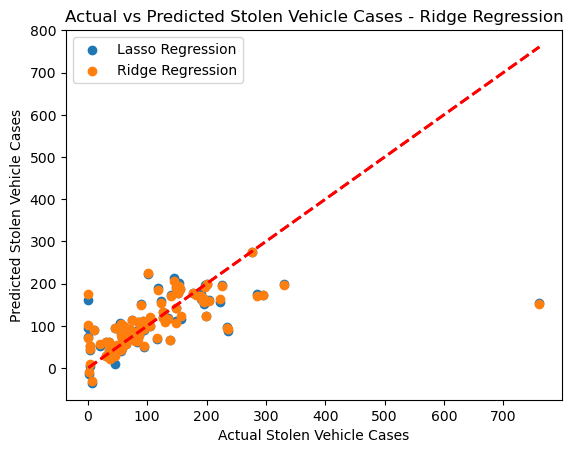

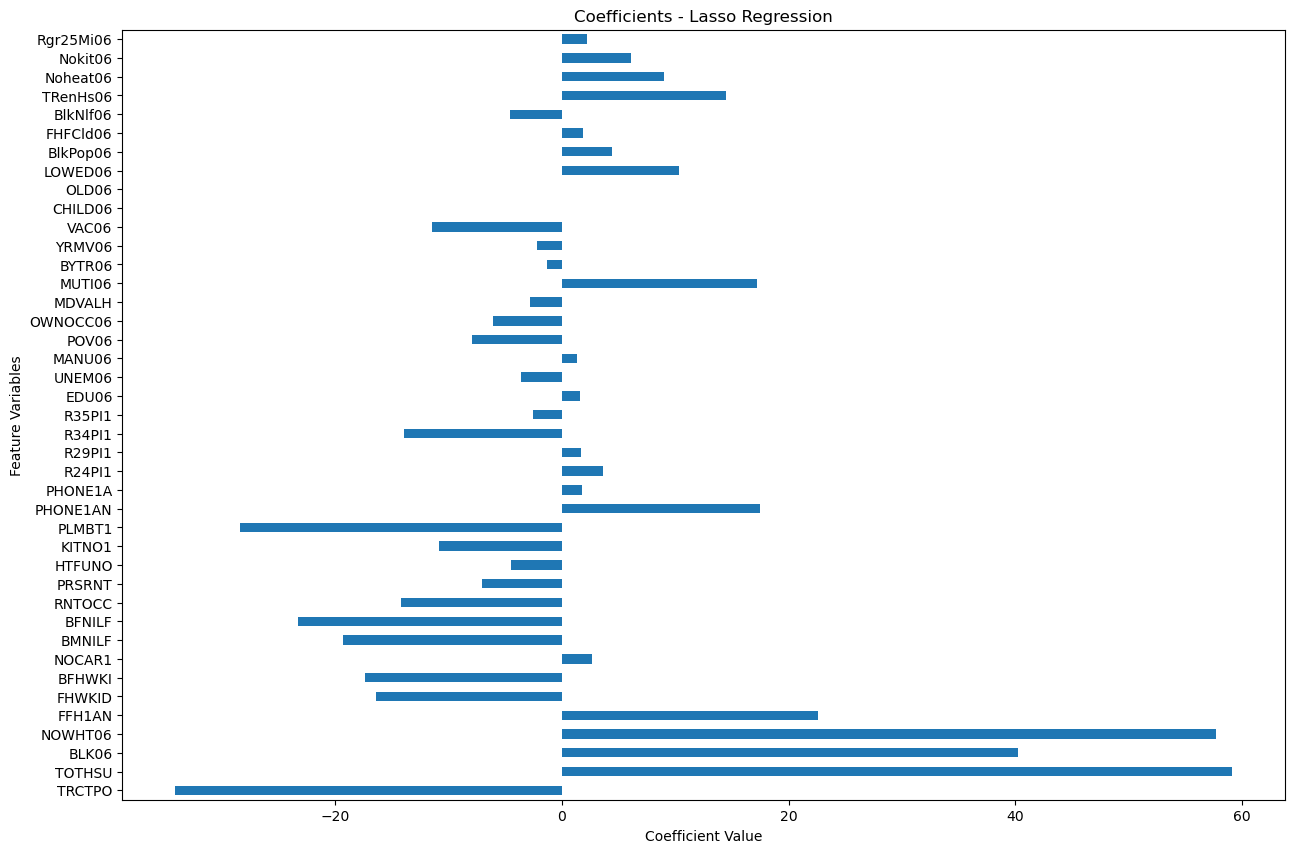

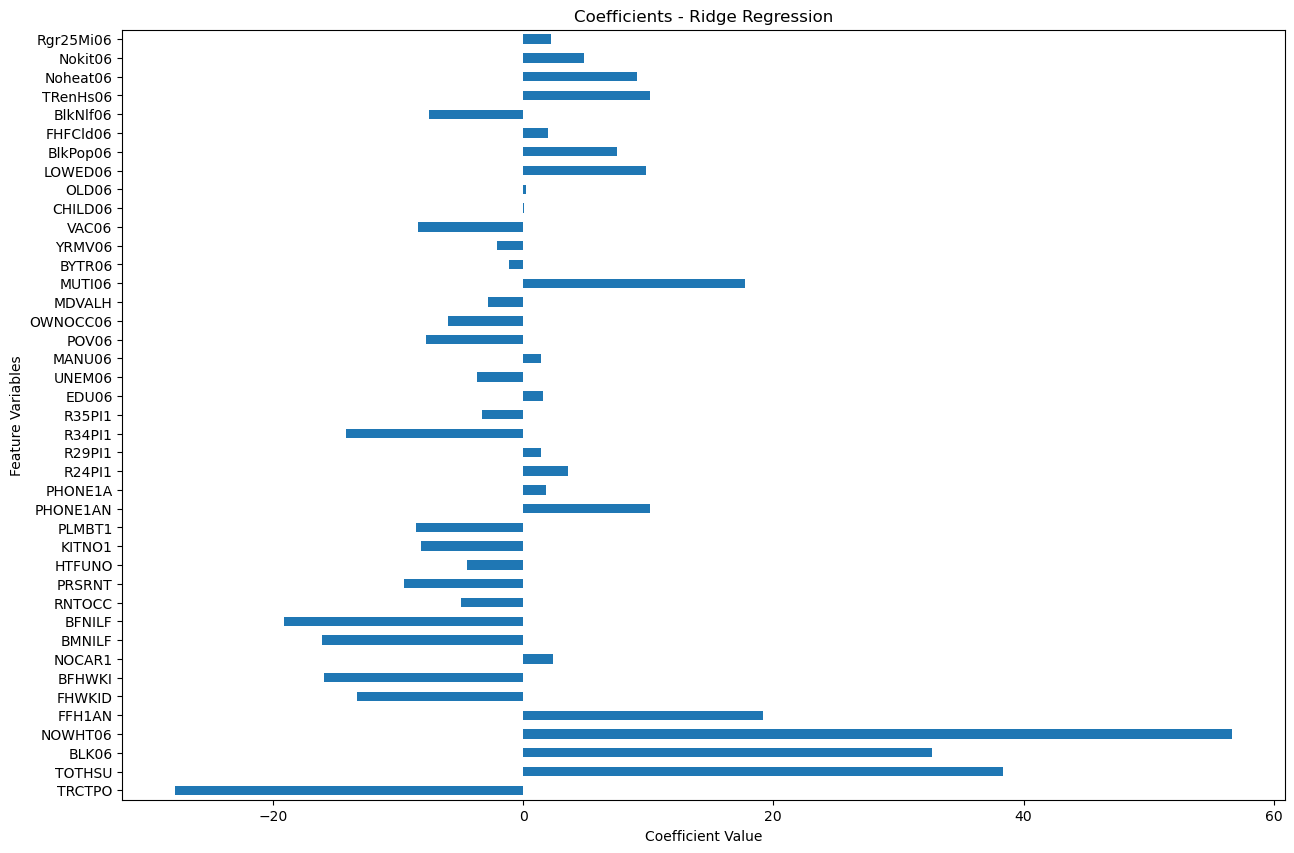

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data_path = r"D:\My_courses\Fall2023\GEOG 670 - Spatial Analysis and Modeling\week14-finalpoj\variable_data.csv"
df = pd.read_csv(data_path)
df.head()

# Assuming 'Join_count' is your dependent variable, and other columns are independent variables
X = df.drop('Join_Count', axis=1)  # Independent variables
y = df['Join_Count']  # Dependent variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.27, random_state=42)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the models
def evaluate_model(model, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

# Evaluate Lasso Regression
print("\nLasso Regression:")
evaluate_model(lasso_model, y_test, y_pred_lasso)

# Evaluate Ridge Regression
print("\nRidge Regression:")
evaluate_model(ridge_model, y_test, y_pred_ridge)

# Plotting predictions vs actual values for Lasso Regression
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # Diagonal line
plt.xlabel("Actual Stolen Vehicle Cases")
plt.ylabel("Predicted Stolen Vehicle Cases")
plt.title("Actual vs Predicted Stolen Vehicle Cases - Lasso Regression")

# Plotting predictions vs actual values for Ridge Regression
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # Diagonal line
plt.xlabel("Actual Stolen Vehicle Cases")
plt.ylabel("Predicted Stolen Vehicle Cases")
plt.title("Actual vs Predicted Stolen Vehicle Cases - Ridge Regression")

plt.legend()
plt.show()

# Plotting coefficients for Lasso Regression
plt.figure(figsize=(15, 10))
ft_importances_lm_lasso = pd.Series(lasso_model.coef_, index=X.columns)
ft_importances_lm_lasso.plot(kind='barh')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Variables")
plt.title("Coefficients - Lasso Regression")
plt.show()

# Plotting coefficients for Ridge Regression
plt.figure(figsize=(15, 10))
ft_importances_lm_ridge = pd.Series(ridge_model.coef_, index=X.columns)
ft_importances_lm_ridge.plot(kind='barh')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Variables")
plt.title("Coefficients - Ridge Regression")
plt.show()



# Using Top 9 Variables to build the Models


Lasso Regression:
Mean Squared Error: 3614.768402772436
R-squared: 0.31151235745252903

Ridge Regression:
Mean Squared Error: 3614.459481797023
R-squared: 0.3115711961526605


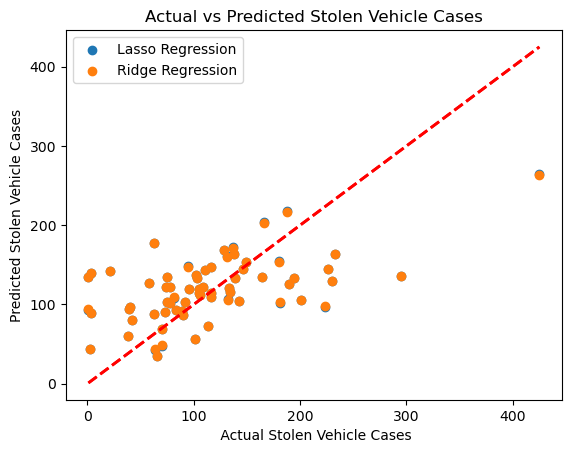

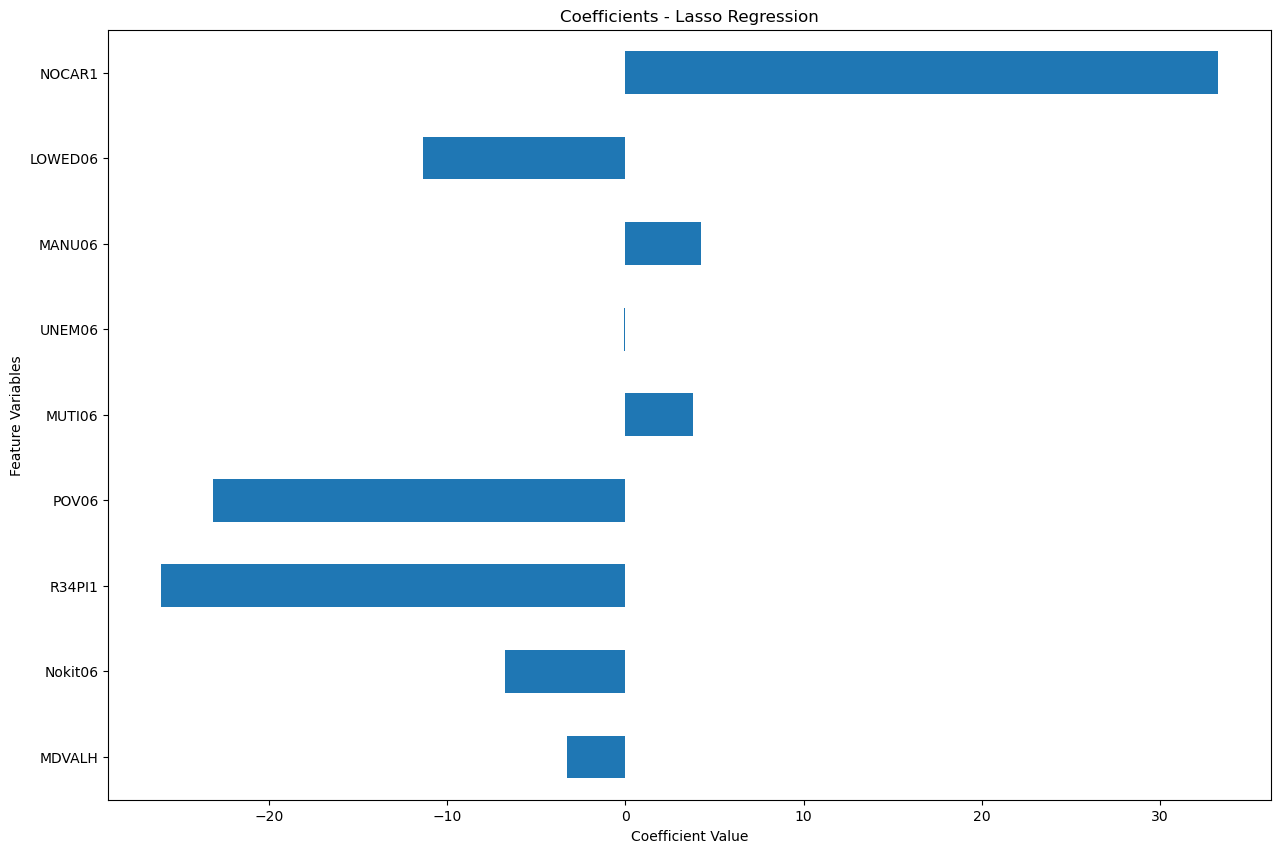

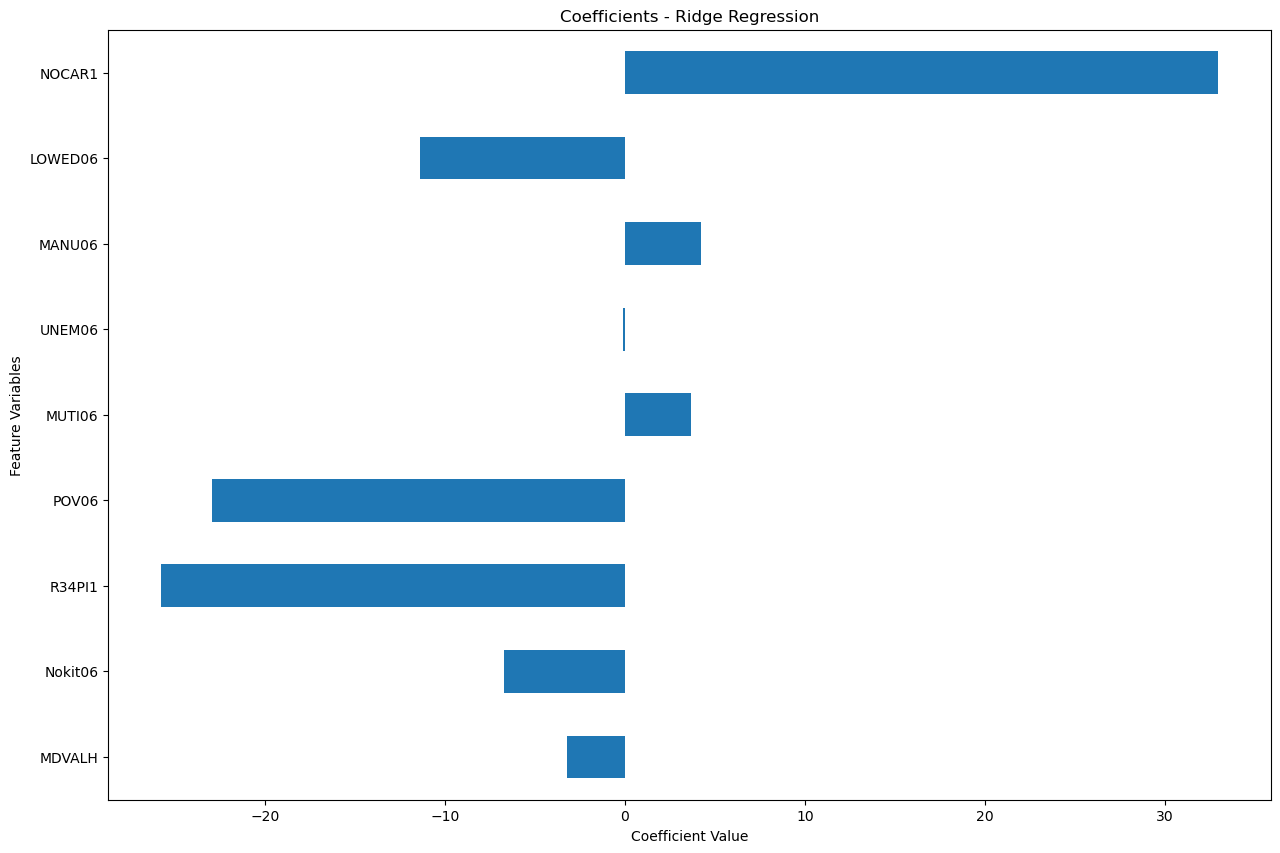

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data_path = r"D:\My_courses\Fall2023\GEOG 670 - Spatial Analysis and Modeling\week14-finalpoj\Newtopvariables.csv"
df = pd.read_csv(data_path)
df.head()

# Assuming 'Join_count' is your dependent variable, and other columns are independent variables
X = df.drop('Join_Count', axis=1)  # Independent variables
y = df['Join_Count']  # Dependent variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert standardized features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.20, random_state=10)

# Ensure the same columns are selected for training and testing
common_columns = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_columns]
X_test = X_test[common_columns]

# Lasso Regression
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the models
def evaluate_model(model, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

# Evaluate Lasso Regression
print("\nLasso Regression:")
evaluate_model(lasso_model, y_test, y_pred_lasso)

# Evaluate Ridge Regression
print("\nRidge Regression:")
evaluate_model(ridge_model, y_test, y_pred_ridge)

# Plotting predictions vs actual values for Lasso Regression
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # Diagonal line
plt.xlabel("Actual Stolen Vehicle Cases")
plt.ylabel("Predicted Stolen Vehicle Cases")
plt.title("Actual vs Predicted Stolen Vehicle Cases ")

# Plotting predictions vs actual values for Ridge Regression
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # Diagonal line
plt.xlabel(" Actual Stolen Vehicle Cases")
plt.ylabel("Predicted Stolen Vehicle Cases")
plt.title("Actual vs Predicted Stolen Vehicle Cases")

plt.legend()
plt.savefig('predictions_vs_actual.png')
plt.show()

# Plotting coefficients for Lasso Regression
plt.figure(figsize=(15, 10))
ft_importances_lm_lasso = pd.Series(lasso_model.coef_, index=X_train.columns)
ft_importances_lm_lasso.plot(kind='barh')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Variables")
plt.title("Coefficients - Lasso Regression")
plt.show()

# Plotting coefficients for Ridge Regression
plt.figure(figsize=(15, 10))
ft_importances_lm_ridge = pd.Series(ridge_model.coef_, index=X_train.columns)
ft_importances_lm_ridge.plot(kind='barh')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Variables")
plt.title("Coefficients - Ridge Regression")
plt.show()

